In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Full Image

In [5]:
full = cv2.imread("C:/Users/dell/Documents/Udemy OpenCV course/sammy.jpg")
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

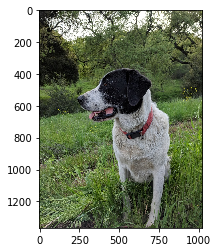

In [6]:
plt.imshow(full)

In [7]:
full.shape

(1367, 1025, 3)

## Template Image

In [8]:
face = cv2.imread("C:/Users/dell/Documents/Udemy OpenCV course/sammy_face.jpg")
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

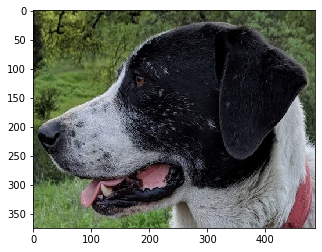

In [9]:
plt.imshow(face)

In [10]:
face.shape

(375, 486, 3)

## Template Matching


In [11]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

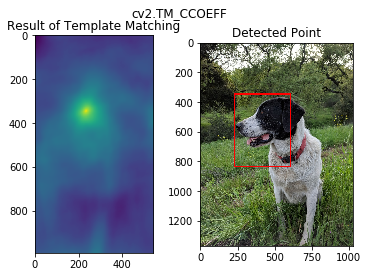

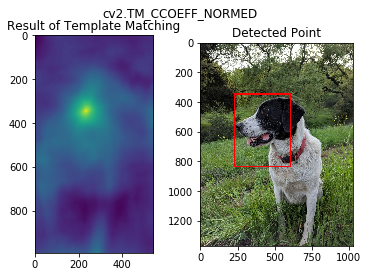

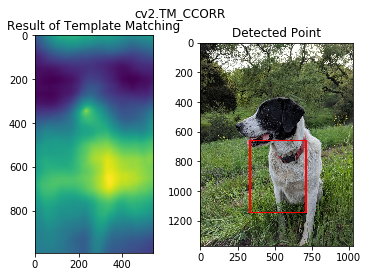

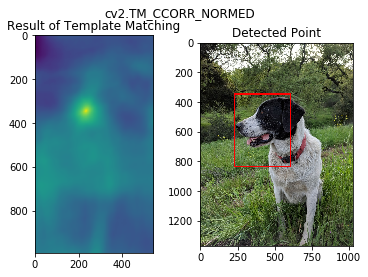

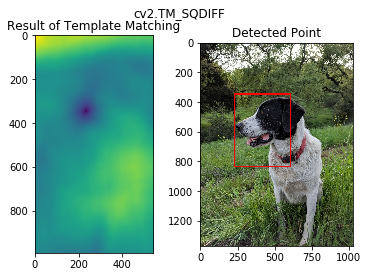

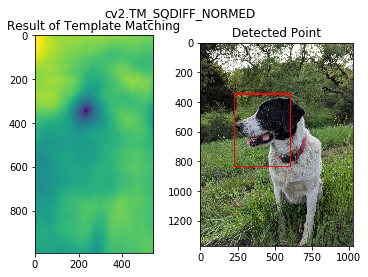

In [13]:
for m in methods:
    
    # Create a copy of the image
    full_copy = full.copy()
    
    method = eval(m)

    res = cv2.matchTemplate(full_copy,face,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    width, height, channels = face.shape
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)
    
    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')
    